In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns


In [2]:
data = pd.read_csv('Wine.csv')

In [32]:
data.shape

(178, 14)

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [5]:
data.Customer_Segment.unique()

array([1, 2, 3], dtype=int64)

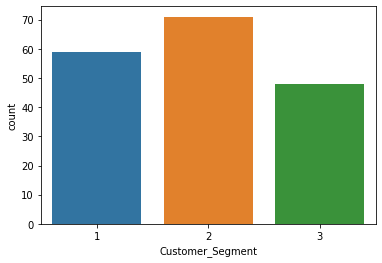

In [6]:
sns.countplot(data.Customer_Segment)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = data.drop(['Customer_Segment'] , axis = 1)
y = data.Customer_Segment

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
clf = DecisionTreeClassifier(max_depth = 7)

In [29]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
y_pred = clf.predict(x_test)

In [31]:
(y_pred == y_test).mean()

0.8888888888888888

In [26]:
y_pred = clf.predict(x_train)

In [27]:
(y_pred == y_train).mean()

1.0

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

C:\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [35]:
(y_pred == y_test).mean()

0.9722222222222222

In [36]:
from sklearn.svm import SVC

In [43]:
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [44]:
y_pred = clf.predict(x_test)
(y_pred == y_test).mean()

0.9444444444444444

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
y_pred = clf.predict(x_test)
(y_pred == y_test).mean()

0.9722222222222222

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.fit_transform(x_test)

In [52]:
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [53]:
y_pred = clf.predict(x_test)
(y_pred == y_test).mean()

0.9722222222222222

In [54]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.353998,0.202060,0.397610,0.148821,-0.612437,-0.997888,-1.357240,0.652892,-0.704687,1.930695,-1.481679,-1.278588,-0.287348
1,0.998013,-0.724401,1.134897,1.616358,-0.957815,1.005442,0.786499,-1.214310,0.423266,-0.753014,1.756836,0.744165,-1.080386
2,1.603188,-0.316758,0.475219,-0.790403,0.907225,2.425125,1.411756,-0.970762,0.978291,1.123884,-0.431350,1.148716,2.313817
3,0.642027,-0.539109,-0.262067,-0.966507,1.183527,1.320927,1.213262,-0.158935,1.264756,0.414739,-0.037477,1.051066,0.140893
4,1.092942,-0.520579,-0.417286,-0.614299,0.561847,0.895022,1.461380,-0.321300,0.799251,1.590985,0.706507,0.660465,1.615943
5,0.582696,-0.455727,1.057288,-0.144687,0.699998,0.058987,0.458983,-0.564849,-0.167567,-0.404811,0.618979,0.339614,1.092538
6,-1.209097,1.054403,-1.465009,-0.144687,-0.888740,-0.493112,-0.424317,0.084613,0.423266,-1.644752,-0.125004,0.590715,-0.591874
7,0.974281,1.693661,0.009565,0.002067,-0.750589,-0.808597,-1.228219,0.977622,-0.131759,1.637695,-1.700498,-1.376239,-0.858335
8,2.054103,-0.520579,0.048369,-2.375343,-0.612437,1.242056,1.610250,0.571709,2.106245,0.104754,1.275435,0.144314,1.267007
9,0.036852,-0.520579,-1.309791,-2.081836,-0.543362,0.642634,1.193412,-1.539041,2.285286,0.869101,0.706507,0.395414,1.267007
